# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [201]:
# Mounts Google drive and creates source to bring in data

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [202]:
# Imports libraries

import h5py

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import losses

from tensorflow.keras import optimizers

**Let us check the version of tensorflow.**

In [203]:
# Prints tensorflow version
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [204]:
# Opens file as read only using google drive file path

h5f = h5py.File('/content/drive/MyDrive/MIT Applied DS/Elective/SVHN_single_grey1.h5', 'r')

# Loads and bifurcates into training and test data

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

print(h5f.keys()) # Prints dataset names in file

h5f.close() # Closes file

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


Check the number of images in the training and the testing dataset.

In [205]:
print(f'{X_train.shape}') # Returns shape of array
print(f'{y_train.shape}\n') # Returns shape of array

print(f'{X_test.shape}') # Returns shape of array
print(f'{y_test.shape}\n') # Returns shape of array

print(len(X_train), len(y_train)) # Returns length of arrays
print(len(X_test), len(y_test)) # Returns length of arrays

(42000, 32, 32)
(42000,)

(18000, 32, 32)
(18000,)

42000 42000
18000 18000


**Observation:**
There are 42,000 images in the training data and 18,000 images in the testing data. X training shape indicates 3D data. Y training shape is 1D and possible 1 to 1 relationship with x training data. Test data has similar relationship.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

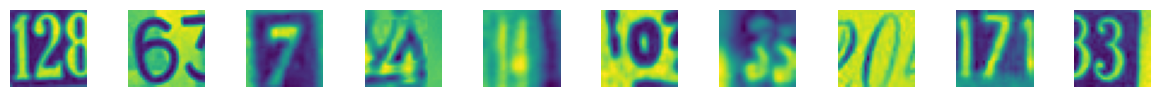

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [206]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (15, 1)) # Sets image size

for i in range(10): # Sets total iteration to 10

    plt.subplot(1, 10, i+1) # Sets iteration current value

    plt.imshow(X_train[i]) # Gets iteration image

    plt.axis('off') # Sets axis visual measurements to off

plt.show() # Displays the 10 images

print('label for each of the above image: %s' % (y_train[0:10])) # Prints first 10 numbers from y_train

Observation: Images can be hard to identify and can have more than one number.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [207]:
print("Shape:", X_train[0].shape,"\n") # Prints the shape of array

print("First image:\n", X_train[0]) # Prints array of pixels for the first image

Shape: (32, 32) 

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [208]:
# Reshaping the dataset to flatten, reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [209]:
# Records prior ranges

X_train_prior = X_train
X_test_prior = X_test

print(f'Min value for was Train = {X_train_prior.min()}, Test = {X_test_prior.min()} ')
print(f'Max value for was Train = {X_train_prior.max()}, Test = {X_test_prior.max()} ')

# Normalizes inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

print(f'Min value for Train = {X_train.min()}, Test = {X_test.min()} ')
print(f'Max value for Train = {X_train.max()}, Test = {X_test.max()} ')

Min value for was Train = 0.0, Test = 0.0 
Max value for was Train = 254.97450256347656, Test = 254.97450256347656 
Min value for Train = 0.0, Test = 0.0 
Max value for Train = 0.9998999834060669, Test = 0.9998999834060669 


Print the shapes of Training and Test data

In [210]:
# Prints new shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [211]:
# creates one-hot encoded matrices

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_test # Test labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [212]:
print(X_train.shape)
print(y_train.shape)

(42000, 1024)
(42000, 10)


**Observation:** Each entry of the target variable is a one-hot encoded vector instead of a single label.



## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [213]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [214]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate=0.001)

    #compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [215]:
# Build the model
model_1 = nn_model_1()

In [216]:
#Print the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [217]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 8ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

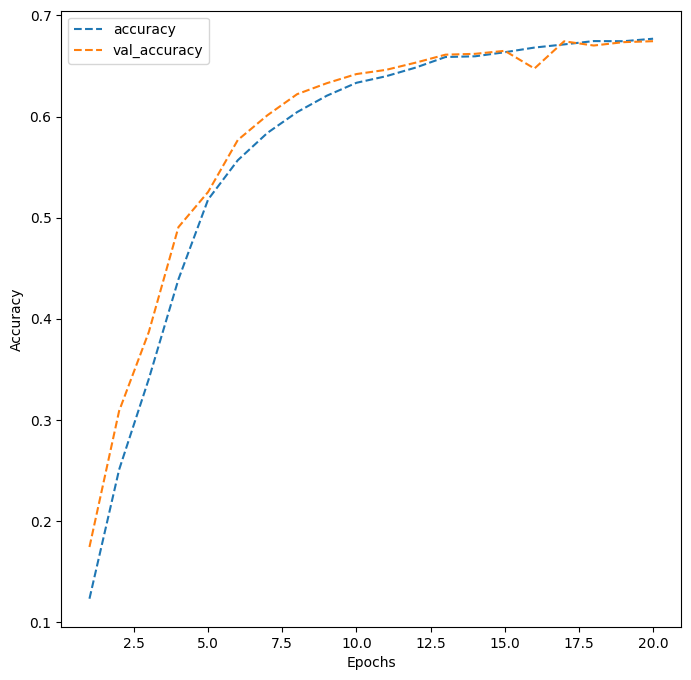

In [218]:
# Plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:

Accuracy for training and validation is very similar, but not the same. This is good pattern showing that the model is not overfitting. However, the accuracy of validation dataset is higher. So, model is not overfit and is giving similar accuracy on training and validation data.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [219]:
#Clearing keras backend
from tensorflow.keras import backend
backend.clear_session()

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [220]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    #declare adam optimizer with learning rate of 0.0005
    adam = optimizers.Adam(learning_rate=0.0005)

    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])

    return model

In [221]:
# Build the model
model_2 = nn_model_2()

In [222]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [223]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)


Epoch 1/30
263/263 [==============================] - 6s 18ms/step - loss: 2.3382 - accuracy: 0.1012 - val_loss: 2.3024 - val_accuracy: 0.1168
Epoch 2/30
263/263 [==============================] - 4s 16ms/step - loss: 2.2677 - accuracy: 0.1358 - val_loss: 2.2488 - val_accuracy: 0.1663
Epoch 3/30
263/263 [==============================] - 3s 12ms/step - loss: 1.8886 - accuracy: 0.3186 - val_loss: 1.6322 - val_accuracy: 0.4767
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.4774 - accuracy: 0.5034 - val_loss: 1.3023 - val_accuracy: 0.5829
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2653 - accuracy: 0.5871 - val_loss: 1.1433 - val_accuracy: 0.6405
Epoch 6/30
263/263 [==============================] - 5s 18ms/step - loss: 1.1743 - accuracy: 0.6235 - val_loss: 1.1447 - val_accuracy: 0.6274
Epoch 7/30
263/263 [==============================] - 4s 15ms/step - loss: 1.1192 - accuracy: 0.6410 - val_loss: 1.0544 - val_accuracy: 0.6623

### **Plot the Training and Validation Accuracies and write down your Observations.**

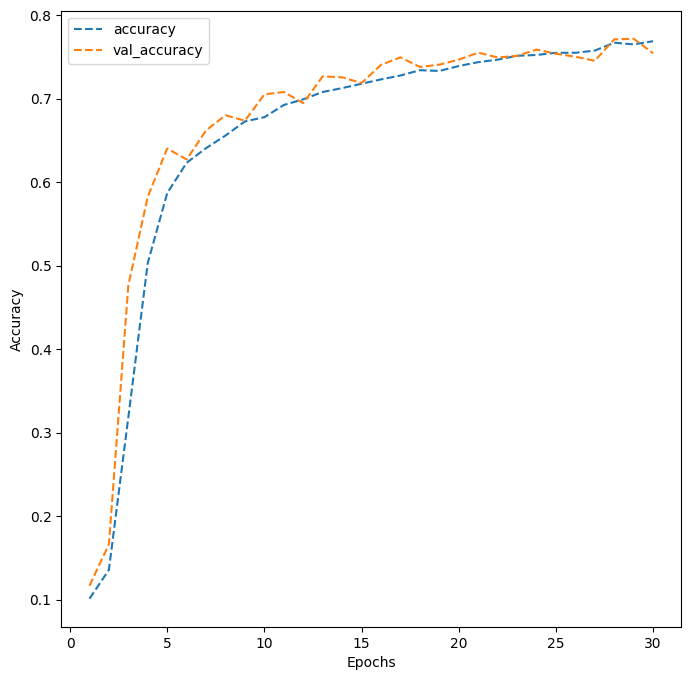

In [224]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:

Both datasets maintain similar accuracy with positive trend. The model performs better with accuracy set to 0.77 instead of 0.70

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [225]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [226]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1814
           1       0.73      0.76      0.75      1828
           2       0.76      0.81      0.78      1803
           3       0.73      0.71      0.72      1719
           4       0.73      0.84      0.78      1812
           5       0.73      0.68      0.71      1768
           6       0.79      0.71      0.75      1832
           7       0.78      0.81      0.80      1808
           8       0.71      0.71      0.71      1812
           9       0.71      0.75      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



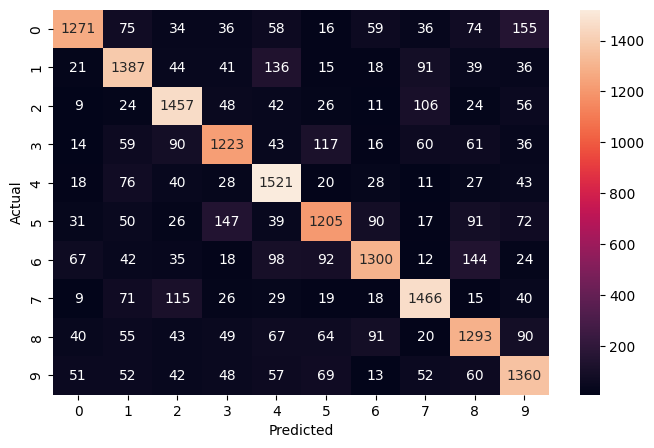

In [227]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations: *****

Model is 75% accurate. Classification report tells us that the number 7 has the highest f1-score (0.80) meaning they have it has the best chance of being accurately recognized. On the other hand, numbers 5 and 8 have the lowest f1-score of (0.71).

Numbers 8 and 9 have the lowest precision and 0 has the highest. This indicates that the model is classifing other numbers as 8 and 9 which not correct. In addition, 0 has the lowest chance of being a false positive.

Number 4 has the highest recall and 5 has the lowest. It indicates that the model is struggling to identify the number 5. However, the model idenifies the number 4 in high rates of completion.

The confusion matrix shows that the model struggles with 8 and 9, which supports our findings.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [228]:
# Opens file as read only using google drive file path

h5f = h5py.File('/content/drive/MyDrive/MIT Applied DS/Elective/SVHN_single_grey1.h5', 'r')

# Loads and bifurcates into training and test data

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

print(h5f.keys()) # Prints dataset names in file

h5f.close() # Closes file

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


Check the number of images in the training and the testing dataset.

In [229]:
print(f'{X_train.shape}') # Returns shape of array
print(f'{y_train.shape}\n') # Returns shape of array

print(f'{X_test.shape}') # Returns shape of array
print(f'{y_test.shape}\n') # Returns shape of array

print(len(X_train), len(y_train)) # Returns length of arrays
print(len(X_test), len(y_test)) # Returns length of arrays

(42000, 32, 32)
(42000,)

(18000, 32, 32)
(18000,)

42000 42000
18000 18000


**Observation: There are 42,000 images in the training data and 18,000 images in the testing data.**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [230]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [231]:
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

Normalize inputs from 0-255 to 0-1

In [232]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [233]:
# New shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [234]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation: Each entry of the target variable is a one-hot encoded vector instead of a single label.**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [235]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [241]:
#Define the function
def cnn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )

    return model

In [242]:
# Build the model

model_3 = cnn_model_1()

In [243]:
# Print the model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [187]:
# Fit the model

history_model_3 = model_3.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size = 32, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 95s 90ms/step - loss: 1.0880 - accuracy: 0.6472 - val_loss: 0.6474 - val_accuracy: 0.8137
Epoch 2/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.5509 - accuracy: 0.8413 - val_loss: 0.5268 - val_accuracy: 0.8519
Epoch 3/20
1050/1050 [==============================] - 99s 95ms/step - loss: 0.4585 - accuracy: 0.8659 - val_loss: 0.5295 - val_accuracy: 0.8483
Epoch 4/20
1050/1050 [==============================] - 95s 90ms/step - loss: 0.3920 - accuracy: 0.8853 - val_loss: 0.4625 - val_accuracy: 0.8714
Epoch 5/20
1050/1050 [==============================] - 111s 105ms/step - loss: 0.3467 - accuracy: 0.8953 - val_loss: 0.4740 - val_accuracy: 0.8675
Epoch 6/20
1050/1050 [==============================] - 123s 118ms/step - loss: 0.3044 - accuracy: 0.9092 - val_loss: 0.4685 - val_accuracy: 0.8710
Epoch 7/20
1050/1050 [==============================] - 105s 100ms/step - loss: 0.2716 - accuracy: 0.9187 - val_loss: 0.

### **Plot the Training and Validation Accuracies and Write your observations.**

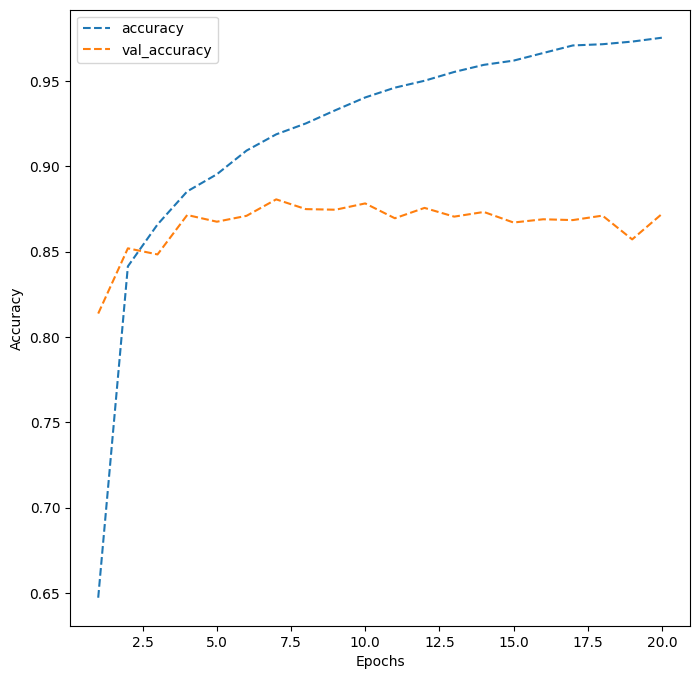

In [244]:
# Plotting the accuracies

dict_hist = history_model_3.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: The model appears overfit because the validation set accuracy is materially lower than the training set accuracy.**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [245]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [246]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [247]:
# Define the model

def cnn_model_2():

    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001
    adam = Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [248]:
# Build the model

model_4 = cnn_model_2()


In [249]:
# Print the summary

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [250]:
# Fit the model

history_model_4 = model_4.fit(X_train, y_train, epochs = 30, validation_split=0.2, batch_size = 128, verbose=1)

Epoch 1/30
263/263 [==============================] - 157s 590ms/step - loss: 1.3271 - accuracy: 0.5491 - val_loss: 1.8763 - val_accuracy: 0.3475
Epoch 2/30
263/263 [==============================] - 160s 609ms/step - loss: 0.6722 - accuracy: 0.7940 - val_loss: 0.5646 - val_accuracy: 0.8446
Epoch 3/30
263/263 [==============================] - 158s 602ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.4333 - val_accuracy: 0.8739
Epoch 4/30
263/263 [==============================] - 158s 602ms/step - loss: 0.4921 - accuracy: 0.8483 - val_loss: 0.4754 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 158s 602ms/step - loss: 0.4399 - accuracy: 0.8624 - val_loss: 0.3768 - val_accuracy: 0.8963
Epoch 6/30
263/263 [==============================] - 160s 609ms/step - loss: 0.4033 - accuracy: 0.8764 - val_loss: 0.3743 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 161s 610ms/step - loss: 0.3876 - accuracy: 0.8813 - val_loss: 0.3795 -

### **Plot the Training and Validation accuracies and write your observations.**

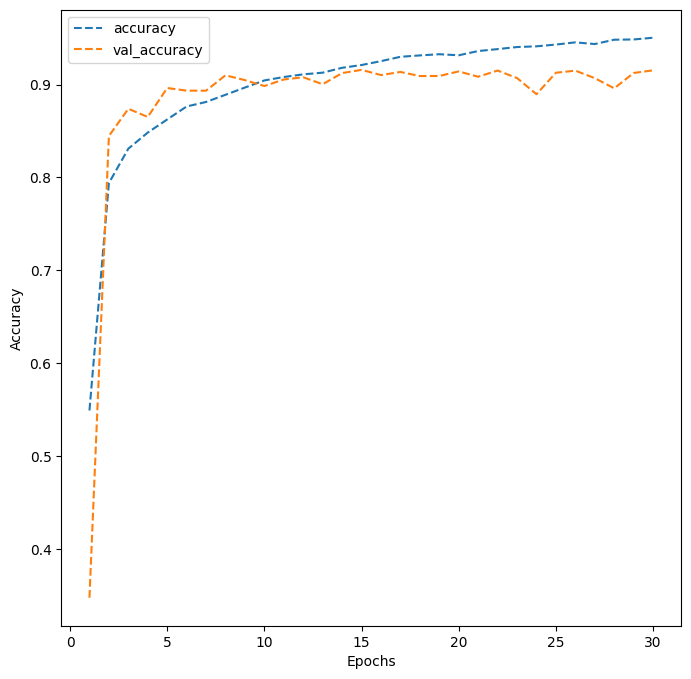

In [251]:
# Plotting the accuracies

dict_hist = history_model_4.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: Accuracy of the validation and training data is much closer now so there should be less overfitting. There is really high accuracy for the training set this time, so model appears improved.**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [252]:
# Make prediction on the test data using model_2

test_pred = model_4.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 23s 41ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [253]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



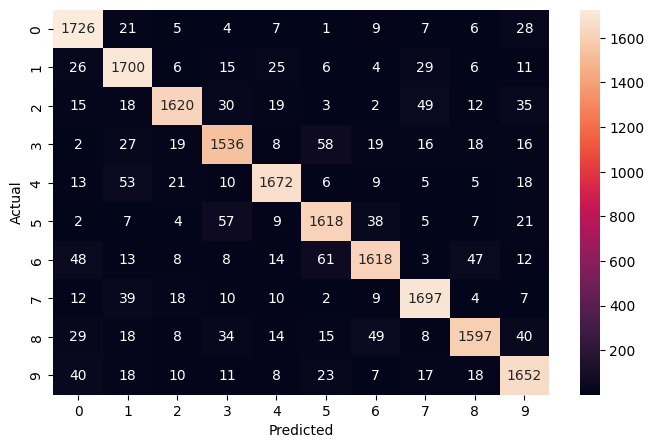

In [254]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:

Model accuracy is above 90%. The precision scores are close enough to indicate that  model is assigning the numbers correctly for most images; thus, the model is giving a generalized performance.

The model still needs to improve recognition of the number 3.

In conclusion, the model performs well to identify individual digits. However, per our tests, it appears that CCN is superior to ANN when identifying numbers in our dataset.